### Task A - Perform data preprocessing on the given text data and convert it into numerical vectors.
### Task B - Build models to predict the Score of a given text review.

#### Client Expectations
1. Show me some nice analysis on the given data.
2. Show me the comparison of various ML models.
3. Model should be light for deployment.
4. Model should have very less latency.
5. Create a REST API to interact with the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Working with Text Data - Preprocessing and Text to Numerical Vector
Text Data
Text Analysis is a major application field for machine learning algorithms. Some of the major application areas of NLP are:

- Spell Checker, Keyword Search, etc
- Sentiment Analysis, Spam Classification
- Machine Translation
- Chatbots/Dialog Systems
- Question Answering Systems etc.. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length

### Why NLP is hard?
- Complexity of representation
- Ambiguity in Natural Langugae
- Text Preprocessing
- Tokenisation

1. `Removing special characters`
2. `Convert sentence into lower case`
3. `Removing stop words`
4. `Stemming or Lemmatization`

### Techniques to convert Text to Numerical Vectors
- Bag of Words
- TF IDF (Term Frequency - Inverse Document Frequency)
- Word2Vec (by Google)
- GloVe (Global Vectors by Stanford) - Not Covered in this notebook
- Pretrained GloVe Embeddings
- FastText (by Facebook) - Not Covered in this notebook
- ELMo (Embeddings from Language Models) - Not Covered in this notebook


In [ ]:
import pandas as pd
import numpy as np
import re
import os
from datetime import datetime

In [ ]:
# %config InlineBackend.figure_format='retina'
# from  google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/txt_reviews.zip' -d '/content/text'

Streaming output truncated to the last 5000 lines.
  inflating: /content/text/txt_reviews/review_95499.txt  
  inflating: /content/text/txt_reviews/review_955.txt  
  inflating: /content/text/txt_reviews/review_9550.txt  
  inflating: /content/text/txt_reviews/review_95500.txt  
  inflating: /content/text/txt_reviews/review_95501.txt  
  inflating: /content/text/txt_reviews/review_95502.txt  
  inflating: /content/text/txt_reviews/review_95503.txt  
  inflating: /content/text/txt_reviews/review_95504.txt  
  inflating: /content/text/txt_reviews/review_95505.txt  
  inflating: /content/text/txt_reviews/review_95506.txt  
  inflating: /content/text/txt_reviews/review_95507.txt  
  inflating: /content/text/txt_reviews/review_95508.txt  
  inflating: /content/text/txt_reviews/review_95509.txt  
  inflating: /content/text/txt_reviews/review_9551.txt  
  inflating: /content/text/txt_reviews/review_95510.txt  
  inflating: /content/text/txt_reviews/review_95511.txt  
  inflating: /content/tex

In [ ]:
root_dir = '/content/text/txt_reviews'

In [ ]:
file_names = os.listdir('/content/text/txt_reviews')
print('Total no of files in dataset', len(file_names))

Total no of files in dataset 568454


In [ ]:

ProductId = []
UserId = []
ProfileName = []
HelpfulnessNumerator = []
HelpfulnessDenominator = []
Score = []
Time = []
ReviewSummary = []
ReviewText = []

for file in file_names:
  with open(os.path.join(root_dir,file),'rt') as f:
    lines = f.readlines()
    ProductId.append(lines[0].split(':')[1].strip('\n'))
    UserId.append(lines[1].split(':')[1].strip('\n'))
    ProfileName.append(lines[2].split(':')[1].strip('\n'))
    HelpfulnessNumerator.append(lines[3].split(':')[1].strip('\n'))
    HelpfulnessDenominator.append(lines[4].split(':')[1].strip('\n'))
    Score.append(lines[5].split(':')[1].strip('\n'))
    Time.append(lines[6].split(':')[1].strip('\n'))
    ReviewSummary.append(lines[7].split(':')[1].strip('\n'))
    ReviewText.append(lines[8].split(':')[1].strip('\n'))

df = pd.DataFrame({ 'ProductId' : ProductId,
                    'UserId': UserId,
                    'ProfileName' : ProfileName,
                    'HelpfulnessNumerator' : HelpfulnessNumerator,
                    'HelpfulnessDenominator' : HelpfulnessDenominator,
                    'Score' : Score,
                    'Time' : Time,
                    'ReviewSummary' : ReviewSummary,
                    'ReviewText' : ReviewText })

In [ ]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B0012TYZ4K,A1GXXM3NK880CL,M. Hinderberger,0,0,5,1238544000,LOVE THEM!!,This product is a FANTASTIC assortment of che...
1,B000G6XFLE,A6C6N8DA1ROQI,J. Koontz,1,2,5,1262476800,GREAT,AT TIMES ITS JUST SPICEY MUSTARD & AT OTHER T...
2,B000HJ7AIY,AZRK50YB3ORRZ,"Stephanie M. Corby ""Being""",0,0,2,1219708800,more moths,I think the pheromone encouraged breeding ......
3,B000WB1YSE,A2JYKQ35ZM5H9P,Blue Grass,1,1,5,1282262400,simply the best,Kirkland Green Tea is far and away the best g...
4,B001E50THY,A37NNC4NMVMR4S,J. Mulrooney,0,0,5,1273795200,Great Coffee!,Love this coffee and the price is right. Have...


In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Course/NLP/txt_review.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Course/NLP/txt_review.csv',index_col=[0])

In [ ]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B0012TYZ4K,A1GXXM3NK880CL,M. Hinderberger,0,0,5,1238544000,LOVE THEM!!,This product is a FANTASTIC assortment of che...
1,B000G6XFLE,A6C6N8DA1ROQI,J. Koontz,1,2,5,1262476800,GREAT,AT TIMES ITS JUST SPICEY MUSTARD & AT OTHER T...
2,B000HJ7AIY,AZRK50YB3ORRZ,"Stephanie M. Corby ""Being""",0,0,2,1219708800,more moths,I think the pheromone encouraged breeding ......
3,B000WB1YSE,A2JYKQ35ZM5H9P,Blue Grass,1,1,5,1282262400,simply the best,Kirkland Green Tea is far and away the best g...
4,B001E50THY,A37NNC4NMVMR4S,J. Mulrooney,0,0,5,1273795200,Great Coffee!,Love this coffee and the price is right. Have...
...,...,...,...,...,...,...,...,...,...
568449,B003J9R3MM,A291EV49PKFERO,nurse,0,0,5,1293753600,Revolution Dragon eye oolong tea,"Love the tea, it has a sweet peach/apricot ta..."
568450,B000Z8RZ3M,A3E6YAXDLBZFN2,cdelight,0,1,3,1328400000,Not as good as I was hoping,I tried three flavors of Tastykake after I he...
568451,B007TJGY46,A1QL5SGLP4VI34,"mavis, ct, usa",0,0,5,1310774400,fixed the grinds problem; great coffee!,Jet Fuel is nice and strong coffee with excel...
568452,B000RE6GLG,A3VDAHTXBTAEYR,"Nsir Malik ""malikovski""",2,2,5,1326672000,IT REALLY WORKS,BETA SITOSTEROL<br /><br />I ordered and prom...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [ ]:
# df.Time= df.Time.astype('str')

In [ ]:
# df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B000GW68Z8,ARO8G4WT40C88,"Mary M. Bayer ""mimi""",1,1,5,1168473600,Nothing but the best for the Troops!,My mom first sent my husband a box in his car...
1,B001CJSW5S,A2U5QVKBYK57OT,Lynn,0,0,4,1322438400,Pineapple Rum Cake,These cakes are moist and flavorful. Not too ...
2,B00020HHAO,A5CR6GP49HVEE,Stephanie,1,1,4,1295913600,"Not as rose-flavored as you might think, but ...",I bought this tea thinking it would taste lik...
3,B000F9Z1ZK,A132ETQPMHQ585,"Donna's Reviews ""I Love Shopping on Amazon!""",0,1,5,1331596800,Have always loved these...,Have always loved these...Snackwell's Devil's...
4,B001GQ3E2I,A1WXFUNDQBAJSH,JP,0,2,5,1324771200,Good stuff,My parents only eat this now because it doesn...


In [ ]:
df.Time = df.Time.astype('int64')

In [ ]:
df["Time"]=df["Time"].apply(lambda x:''.join(re.findall('(.*)T',datetime.fromtimestamp(x).isoformat())))


In [ ]:
df.Time = pd.to_datetime(df.Time)

In [ ]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B0012TYZ4K,A1GXXM3NK880CL,M. Hinderberger,0,0,5,2009-04-01,LOVE THEM!!,This product is a FANTASTIC assortment of che...
1,B000G6XFLE,A6C6N8DA1ROQI,J. Koontz,1,2,5,2010-01-03,GREAT,AT TIMES ITS JUST SPICEY MUSTARD & AT OTHER T...
2,B000HJ7AIY,AZRK50YB3ORRZ,"Stephanie M. Corby ""Being""",0,0,2,2008-08-26,more moths,I think the pheromone encouraged breeding ......
3,B000WB1YSE,A2JYKQ35ZM5H9P,Blue Grass,1,1,5,2010-08-20,simply the best,Kirkland Green Tea is far and away the best g...
4,B001E50THY,A37NNC4NMVMR4S,J. Mulrooney,0,0,5,2010-05-14,Great Coffee!,Love this coffee and the price is right. Have...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568454 non-null  object        
 1   UserId                  568454 non-null  object        
 2   ProfileName             568454 non-null  object        
 3   HelpfulnessNumerator    568454 non-null  int64         
 4   HelpfulnessDenominator  568454 non-null  int64         
 5   Score                   568454 non-null  int64         
 6   Time                    568454 non-null  datetime64[ns]
 7   ReviewSummary           568454 non-null  object        
 8   ReviewText              568454 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 43.4+ MB


In [ ]:
df.loc[df['Score']<3,'Score']=0
df.loc[df['Score']>3,'Score']=1


In [ ]:
df = df[df['Score']!=3]


In [ ]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B0012TYZ4K,A1GXXM3NK880CL,M. Hinderberger,0,0,1,2009-04-01,LOVE THEM!!,This product is a FANTASTIC assortment of che...
1,B000G6XFLE,A6C6N8DA1ROQI,J. Koontz,1,2,1,2010-01-03,GREAT,AT TIMES ITS JUST SPICEY MUSTARD & AT OTHER T...
2,B000HJ7AIY,AZRK50YB3ORRZ,"Stephanie M. Corby ""Being""",0,0,0,2008-08-26,more moths,I think the pheromone encouraged breeding ......
3,B000WB1YSE,A2JYKQ35ZM5H9P,Blue Grass,1,1,1,2010-08-20,simply the best,Kirkland Green Tea is far and away the best g...
4,B001E50THY,A37NNC4NMVMR4S,J. Mulrooney,0,0,1,2010-05-14,Great Coffee!,Love this coffee and the price is right. Have...
...,...,...,...,...,...,...,...,...,...
568448,B000NUOH7E,A2L6D5BDJURCCM,Neal Baker,0,0,0,2012-09-08,Reeses sugar-free peanut butter cups,"I like the product.<br /><br />However, it to..."
568449,B003J9R3MM,A291EV49PKFERO,nurse,0,0,1,2010-12-31,Revolution Dragon eye oolong tea,"Love the tea, it has a sweet peach/apricot ta..."
568451,B007TJGY46,A1QL5SGLP4VI34,"mavis, ct, usa",0,0,1,2011-07-16,fixed the grinds problem; great coffee!,Jet Fuel is nice and strong coffee with excel...
568452,B000RE6GLG,A3VDAHTXBTAEYR,"Nsir Malik ""malikovski""",2,2,1,2012-01-16,IT REALLY WORKS,BETA SITOSTEROL<br /><br />I ordered and prom...


In [ ]:
df.duplicated().sum()

262

In [ ]:
df.drop_duplicates(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(ReviewText, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", ReviewText)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens)])

In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df1=df[["ReviewText","Score","ReviewSummary"]]

In [ ]:
df1.duplicated().sum()

160833

In [ ]:
df1.drop_duplicates(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1['Review+summary'] = df1.ReviewText.str.cat(df1.ReviewSummary) 

<ipython-input-25-e8fc01b7b095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review+summary'] = df1.ReviewText.str.cat(df1.ReviewSummary)


In [ ]:
df1.duplicated().sum()


160571

In [ ]:
temp_df = df1['Review+summary'].progress_apply(lambda x: preprocess(x, 'lemma'))



100%|██████████| 525552/525552 [1:57:21<00:00, 74.63it/s]


In [ ]:
temp_df.columns = ['Review_clean_text']

temp_df.duplicated().sum()

659

In [ ]:
temp_df["Score"]=df1["Score"]


In [ ]:
temp_df
temp_df.duplicated().sum()

655

In [ ]:
temp_df.drop_duplicates(inplace=True)

In [ ]:
temp_df.duplicated().sum()

0

In [ ]:
temp_df

,Review_clean_text,Score
0,product fantastic assortment chew different sh...,1
1,time spicey mustard time spicey good br weak h...,1
2,think pheromone encouraged breeding swear moth...,0
3,kirkland green tea far away best green tea bag...,1
4,love coffee price right autoship nice rich smo...,1
...,...,...
568446,fantastic mix husband even know gf boy asked s...,1
568448,like product br br however took quite got br b...,0
568449,love tea sweet peach apricot taste lot people ...,1
568452,beta sitosterol br br ordered promptly got usi...,1


In [ ]:
temp_df.to_csv('/content/drive/MyDrive/Data Science Course/NLP/temp_df.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Course/NLP/temp_df.csv')

In [ ]:
df.isna().sum()

Unnamed: 0           0
Review_clean_text    1
Score                0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Unnamed: 0           0
Review_clean_text    0
Score                0
dtype: int64

In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 46.5 MB/s eta 0:00:00


In [ ]:
import sweetviz as sw

                                             |          | [  0%]   00:00 -> (? left)


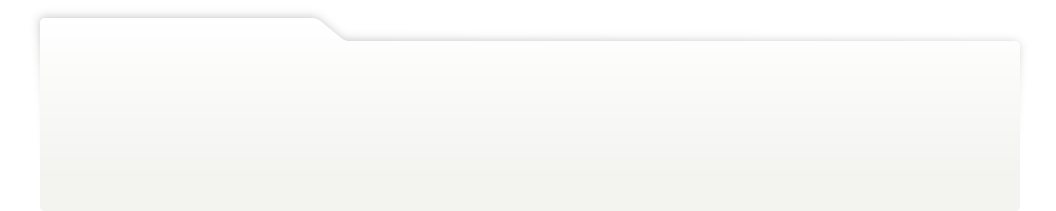
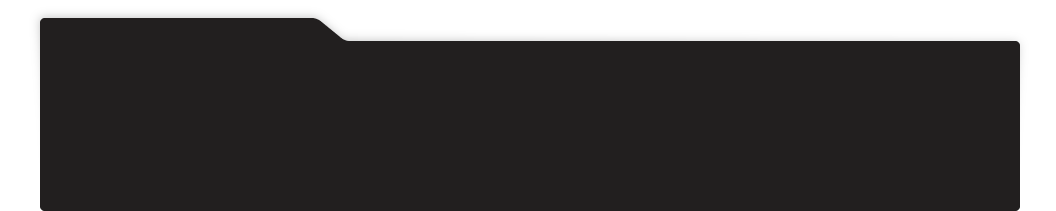
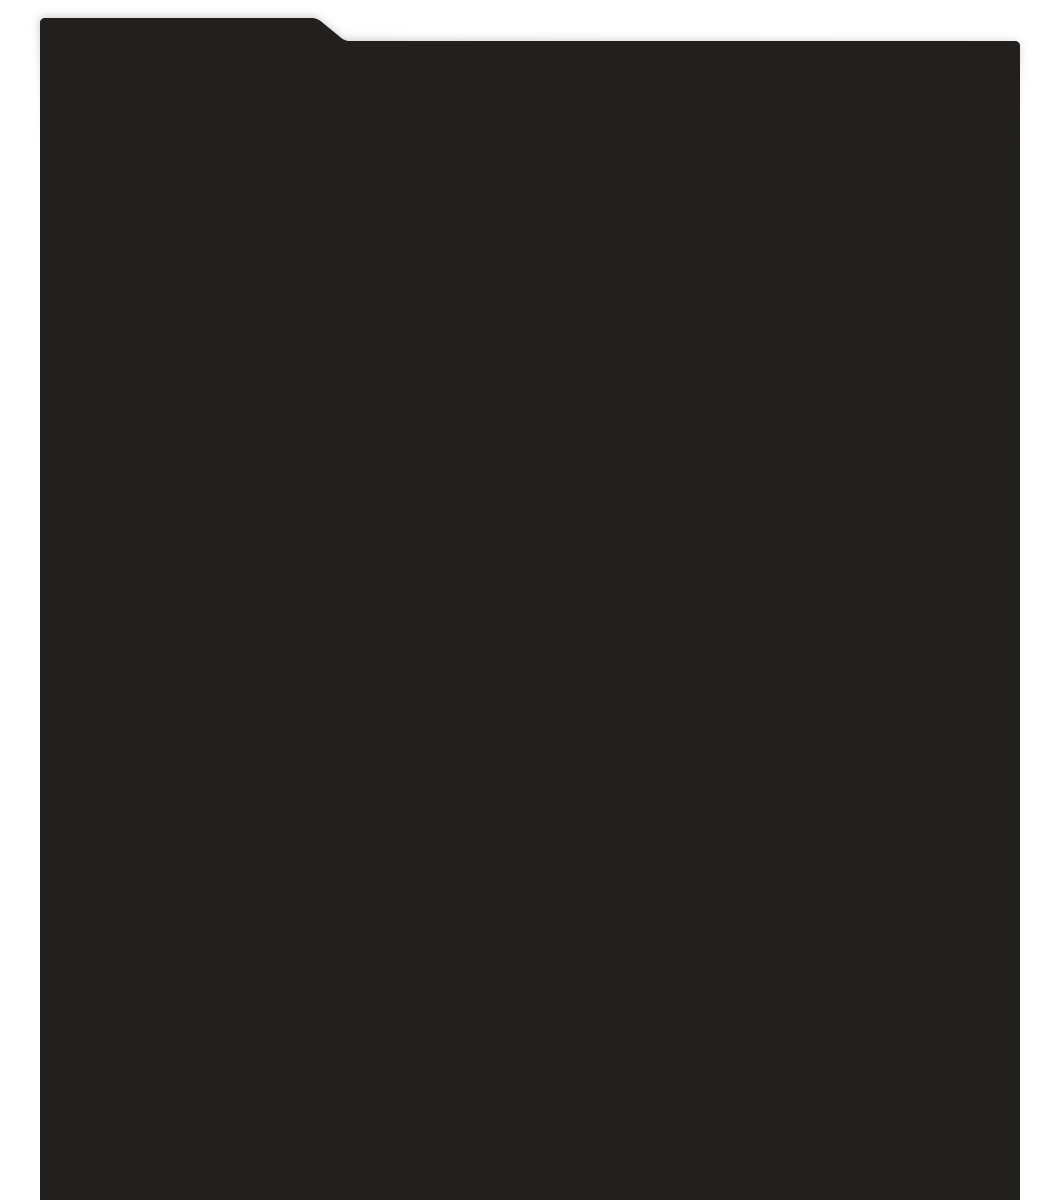
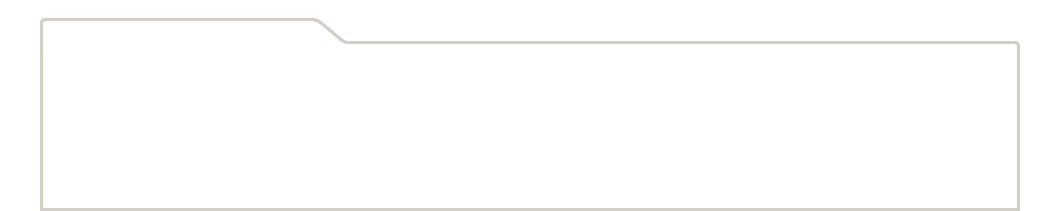
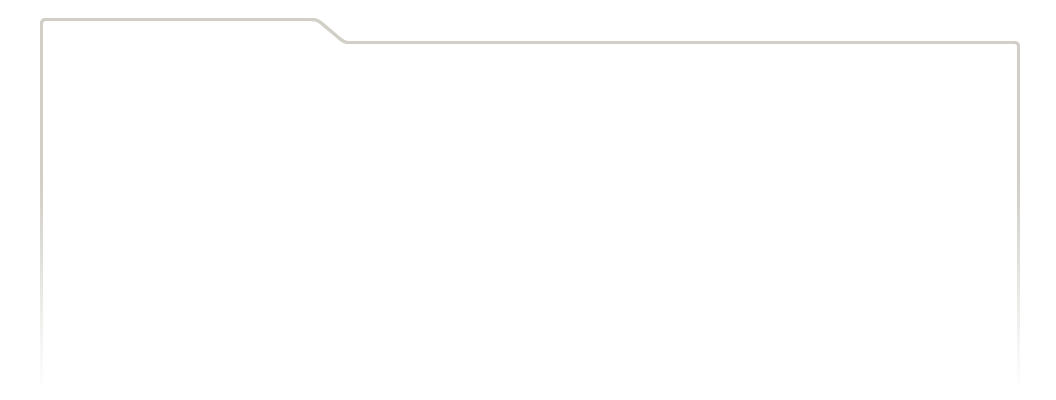
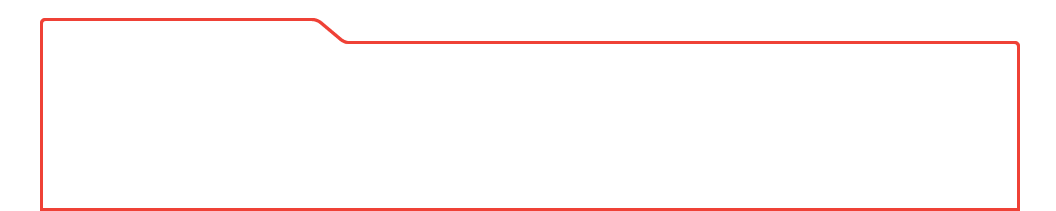
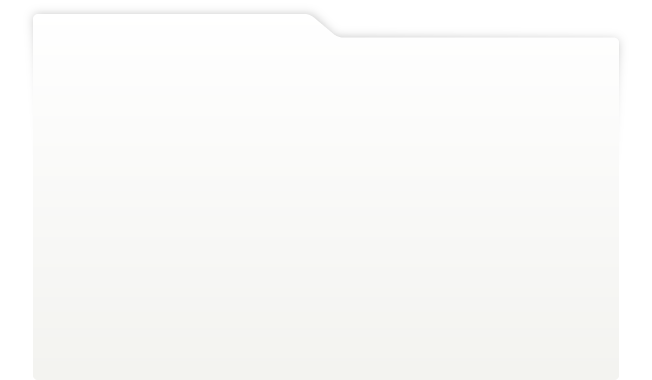
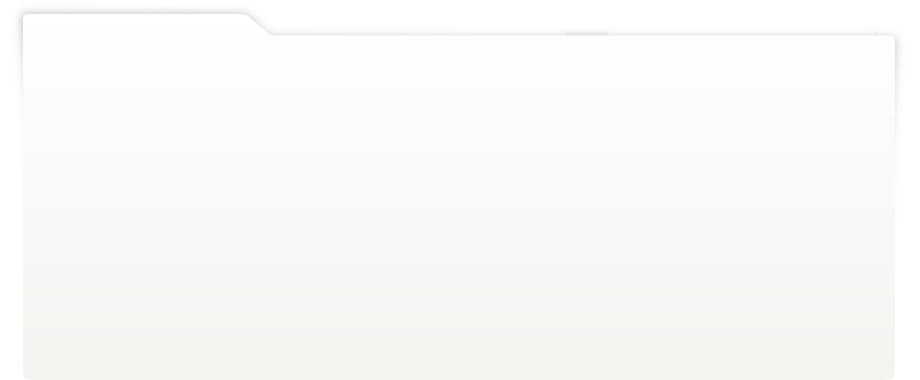
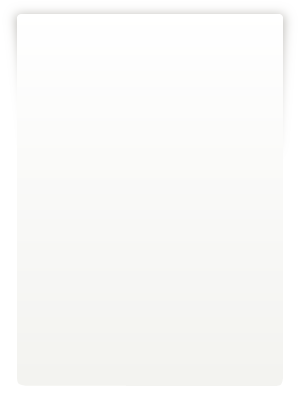
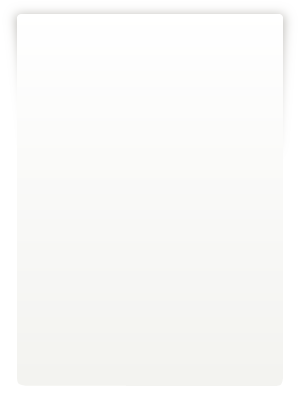
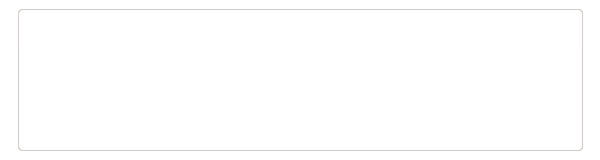
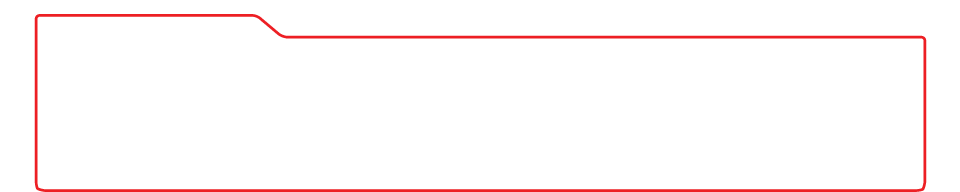
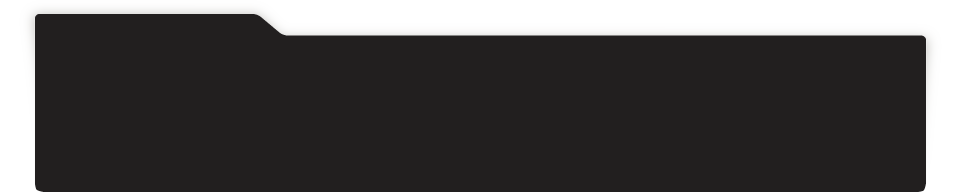
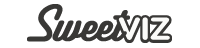
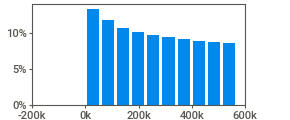
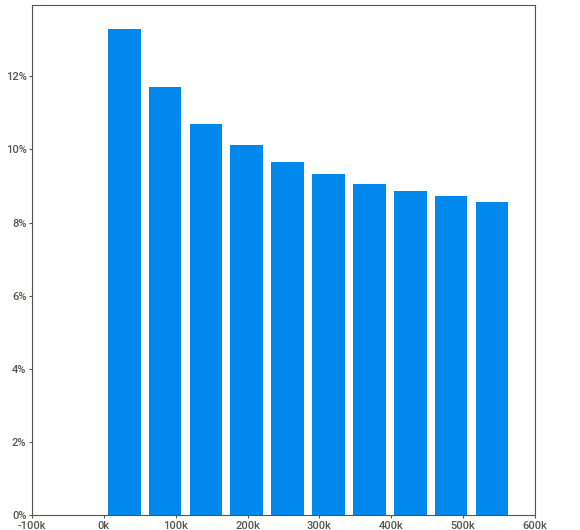
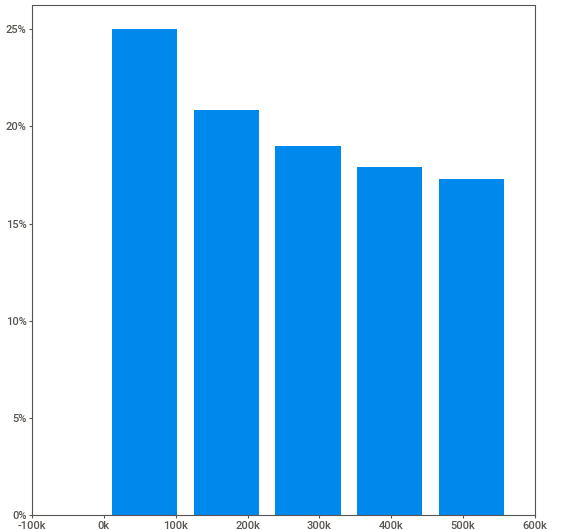
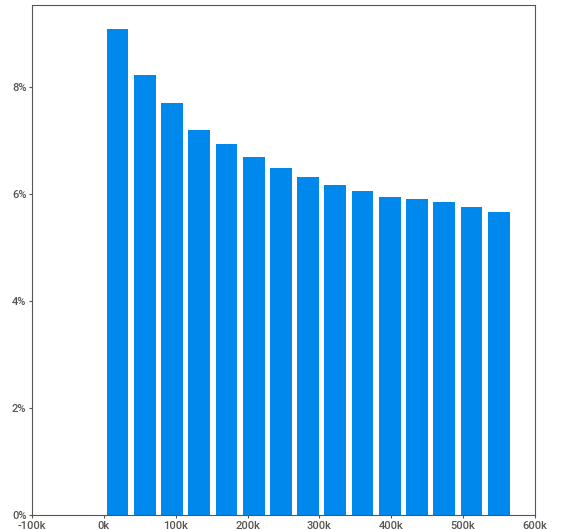
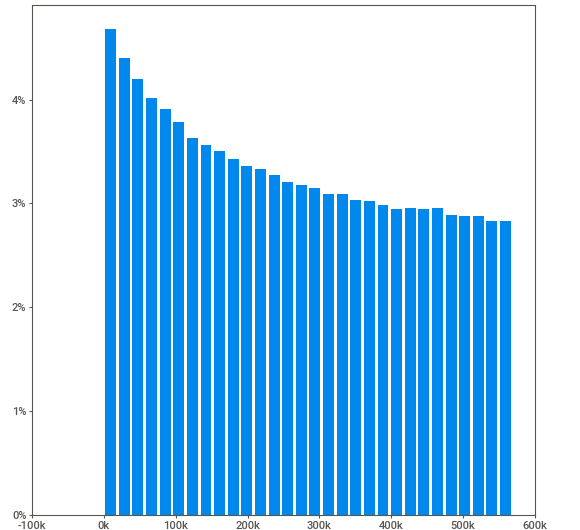
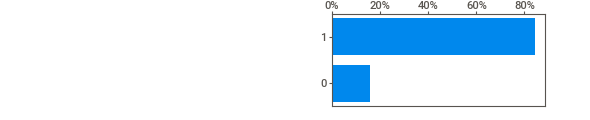
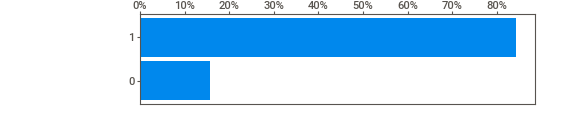
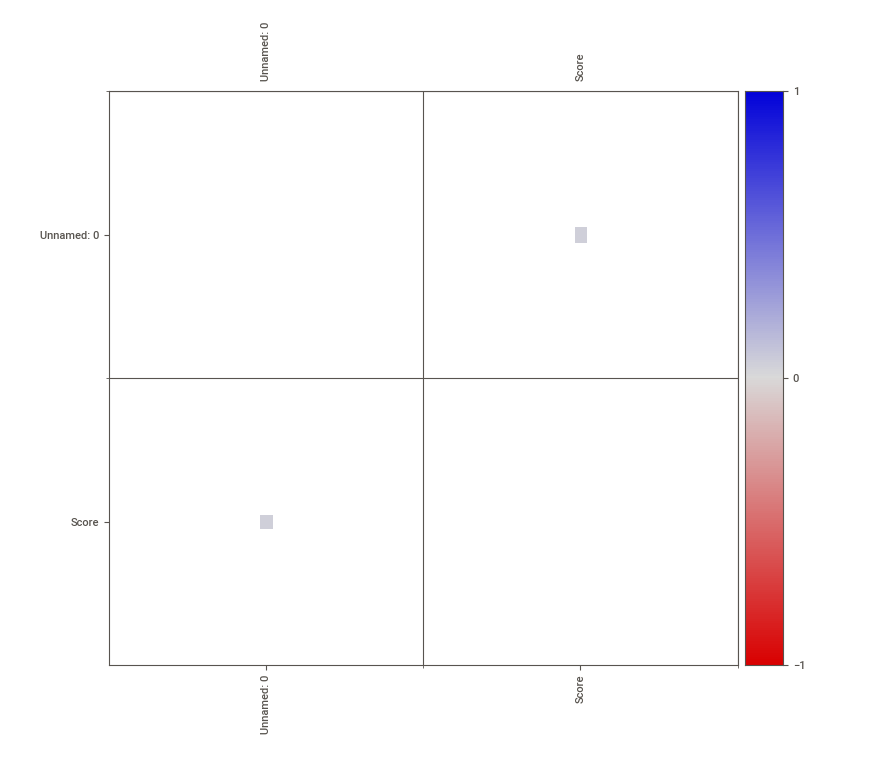
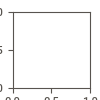

In [ ]:
my_report = sw.analyze(df)
my_report.show_notebook()

In [ ]:
X = df[['Review_clean_text']]
y = df['Score']


In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(291460, 1) (291460,)
(72865, 1) (72865,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocab = TfidfVectorizer()
X_train_trans = vocab.fit_transform(X_train['Review_clean_text'])
X_test_trans = vocab.transform(X_test['Review_clean_text'])

In [ ]:
print(len(vocab.vocabulary_))

print(type(X_train_trans))

print( X_train_trans.shape)

83920
<class 'scipy.sparse._csr.csr_matrix'>
(291460, 83920)


In [ ]:
print(X_train_trans.shape)
print(X_test_trans.shape)

(291460, 83920)
(72865, 83920)


## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans, y_train)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
accuracy_log = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_log )

Accuracy : 0.9376243738420367


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_trans, y_train)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
accuracy_DT = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_DT )

Accuracy : 0.8707747203732931


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans, y_train)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
accuracy_KNN = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_KNN )

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans, y_train)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
accuracy_RFC = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_RFC)

## Adaptive Boosting 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_trans, y_train)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
accuracy_ADB = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_ADB)

## Gradient Boosting Decision Tree Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_trans, y_train)
y_test_pred = classifier.predict(X_test_trans)
from sklearn import metrics
accuracy_GBDT = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_GBDT)

In [ ]:
df_data = [['Logistic Regression', accuracy_log],
           ['Decision Tree Classification',accuracy_DT],
           ['KNN Classification',accuracy_KNN],
           ['Random Forest Classification',accuracy_RFC],
           ['Adaptive Boosting Classification',accuracy_ADB],
           ['Gradient Boosting Decision Tree Classifier',accuracy_GBDT ]]

data = pd.DataFrame(df_data, columns = ['Algorithm', 'Accuracy'])

In [ ]:
sns.barplot(y=data.Algorithm, x=data.Accuracy)

## Observation

#### - By observing the above table we can say that Accuracy of `Logistic Regression` is the more i.e. `93.76%` compaired to other algorithms.
#### - Random Forest Classifier and AdaBoost Classifier gives the approximately similar accuracy i.e. 89%.
#### - By compairing all the algorithms we can easily says that Logistic Regression is the best algorithms for prediction of Score of text review.

## Conclusion

#### Logistic Regression is the best algorithms for prediction of Score of text review.